# Benchmark

In this Jupyter notebook, our primary objective is to thoroughly benchmark and compare the performance of our quantum annealing-based optimization problem with that of a classical implementation. This benchmarking process will provide us with valuable insights into the efficiency and effectiveness of the quantum algorithm in solving our specific problem.

Goals of Benchmarking:

**1. Cost Comparison and Visualization:** One of the fundamental aspects of our benchmarking process involves plotting and visually comparing the cost or objective function values obtained from both the quantum annealing and classical implementations. This visual comparison will allow us to quickly assess whether the quantum approach is providing improvements over classical methods.

**2. Relative Error Calculation:** To quantitatively evaluate the accuracy of our quantum annealing results, we will calculate the relative error for the commitment variable 'x' and 'y'. This step involves comparing the commitment values obtained from the quantum solution with those from the classical approach. By calculating the relative error, we can understand the degree of variation between the two methods and gain insights into the precision of our quantum algorithm.

**3.Scalability Testing:** To gauge the scalability of the quantum algorithm, we can gradually increase the size of the optimization problem (e.g., the number of generators or time periods) and observe how both implementations handle larger instances of the problem. This scalability testing will provide insights into the algorithm's efficiency as problem complexity grows.

**4.Statistical Analysis:** Conducting a comprehensive statistical analysis of the results obtained from multiple runs of the quantum algorithm can provide a clearer understanding of its performance characteristics. Analyzing metrics such as mean, standard deviation, and distribution of results can help us make informed decisions about the algorithm's reliability.

**5.Impact of Problem Parameters:** Explore the impact of varying problem parameters (such as constraints or costs) on the performance of both the quantum and classical implementations. This analysis can uncover scenarios where one approach outperforms the other and guide us in selecting the most suitable algorithm for specific problem instances.

### 1. Import all modules

In [1]:
import sys
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
os.environ['DWAVE_API_TOKEN'] = 'DEV-4b730cacad4155ed785fe855ef53a8d4bbfd80e9'
from pulp import *

from pathlib import Path
import sys
sys.path.append('/Users/juanfrancisco/Desktop/uc/uc-problem-annealing')

from uc_annealing import UC_Annealing

### 2. Import data

In [2]:
# import data
demand = pd.read_csv('/Users/juanfrancisco/Desktop/uc/uc-problem-annealing/data/Demand.csv')
fuel_data = pd.read_csv('/Users/juanfrancisco/Desktop/uc/uc-problem-annealing/data/Fuels_data.csv')
generator = pd.read_csv('/Users/juanfrancisco/Desktop/uc/uc-problem-annealing/data/Generators_data.csv')

In [ ]:
# generators for which commitment is necessary
thermal_generators = generator[generator['Up_time']>0]

# non-variable generators
non_var_generators = generator

n_hours = 24
day_demand = demand['Demand'][:n_hours].values - 1000   # rescaled day demand

### 3. Generate results

In [3]:
final_results = pd.DataFrame()
#final_results = pd.read_csv('/Users/juanfrancisco/Desktop/uc/uc-problem-annealing/results/final_results.csv')

In [4]:
iterations = 1
min_number_generators = 10
max_number_generators = 25

for i in range(iterations):
    for idx in range(min_number_generators, max_number_generators):
        
        results = UC_Annealing(day_demand, fuel_data, thermal_generators[:idx]).get_results()
        results['Iteration'] = i
        final_results = pd.concat([final_results, results], ignore_index=True)

final_results.to_csv('/Users/juanfrancisco/Desktop/uc/uc-problem-annealing/results/final_results.csv', index = False)

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/juanfrancisco/Desktop/uc/uc-problem-annealing/env/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/vy/v_4tg6t57js6cy8llt2tqdh80000gn/T/000b556c4e7340ebac3c77507c617597-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/vy/v_4tg6t57js6cy8llt2tqdh80000gn/T/000b556c4e7340ebac3c77507c617597-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 509 COLUMNS
At line 2910 RHS
At line 3415 BOUNDS
At line 3896 ENDATA
Problem MODEL has 504 rows, 480 columns and 1200 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 608790 - 0.00 seconds
Cgl0003I 1 fixed, 1 tightened bounds, 41 strengthened rows, 24 substitutions
Cgl0003I 0 fixed, 1 tightened bounds, 9 strengthened rows, 4 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 3 strengthened rows, 0 substituti

### 4. Plot cost 

We will now plot the cost of the classical and quantum implementation.

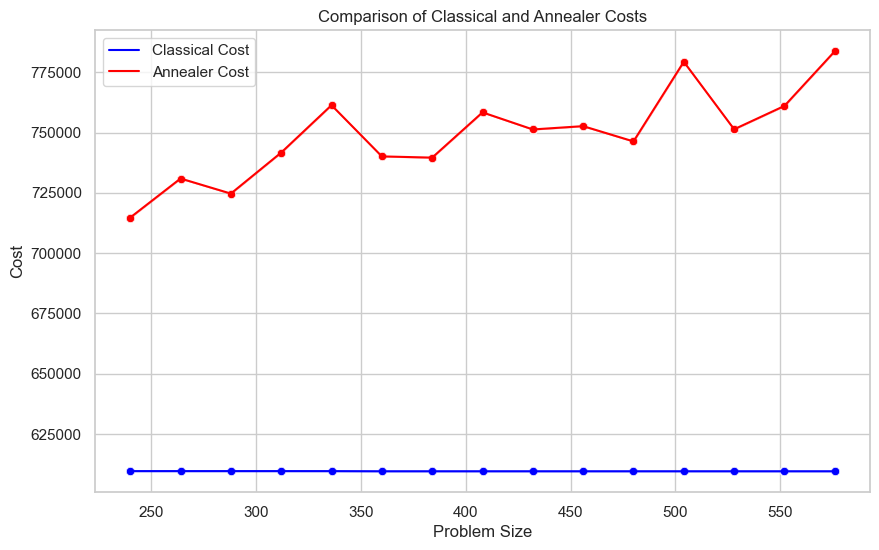

In [18]:
# Create a scatter plot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Assuming 'size' is the column name for problem size and
# 'classical cost' and 'cost annealer' are the columns for costs
sns.scatterplot(data=final_results, x='Size', y='Classical cost', color='blue')
sns.scatterplot(data=final_results, x='Size', y='Cost annealer', color='red')

sns.lineplot(data=final_results, x='Size', y='Classical cost', label='Classical Cost', color='blue')
sns.lineplot(data=final_results, x='Size', y='Cost annealer', label='Annealer Cost', color='red')

plt.xlabel('Problem Size')
plt.ylabel('Cost')
plt.title('Comparison of Classical and Annealer Costs')
plt.legend()
plt.show()

It can be obvserved that as the problem size increases, the cost of the 

## Plot relative error

In [25]:
def calculate_relative_error_bits(bit_string1, bit_string2):
    if len(bit_string1) != len(bit_string2):
        raise ValueError("Bit strings must have the same length")
    
    num_bits = len(bit_string1)
    num_different_bits = np.sum(bit_string1 != bit_string2)
    
    relative_error = num_different_bits / num_bits
    return relative_error

def calculate_relative_error_ints(array1, array2):
    # Calculate the absolute error
    absolute_error = np.abs(array1 - array2)
    
    # Calculate the absolute relative error and then the mean
    absolute_relative_error = np.mean(np.abs(absolute_error))
    
    return absolute_relative_error

In [13]:
final_results

,Generator,Resource,Time,Size,Variables,Generated Energy annealer,Status annealer,Cost annealer,QPU access time [s],QPU charge time [s],QPU run time [s],Generated Energy classical,Generator status classical,Classical cost,Classical execution time [s],Iteration
0,10,natural_gas_fired_combustion_turbine,0,240,480,22.0,1.0,714716.2874,0.016028,5.0,5.001085,0.0,0.0,609551.1780,0.211646,0
1,10,natural_gas_fired_combustion_turbine,1,240,480,22.0,1.0,714716.2874,0.016028,5.0,5.001085,0.0,0.0,609551.1780,0.211646,0
2,10,natural_gas_fired_combustion_turbine,10,240,480,22.0,1.0,714716.2874,0.016028,5.0,5.001085,0.0,0.0,609551.1780,0.211646,0
3,10,natural_gas_fired_combustion_turbine,11,240,480,0.0,0.0,714716.2874,0.016028,5.0,5.001085,0.0,0.0,609551.1780,0.211646,0
4,10,natural_gas_fired_combustion_turbine,12,240,480,22.0,1.0,714716.2874,0.016028,5.0,5.001085,0.0,0.0,609551.1780,0.211646,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,9,natural_gas_fired_combustion_turbine,5,576,1152,25.0,1.0,783708.7600,0.032006,5.0,5.288993,0.0,0.0,609487.9964,0.288956,0
6116,9,natural_gas_fired_combustion_turbine,6,576,1152,25.0,1.0,783708.7600,0.032006,5.0,5.288993,0.0,0.0,609487.9964,0.288956,0
6117,9,natural_gas_fired_combustion_turbine,7,576,1152,-0.0,0.0,783708.7600,0.032006,5.0,5.288993,0.0,0.0,609487.9964,0.288956,0
6118,9,natural_gas_fired_combustion_turbine,8,576,1152,44.0,1.0,783708.7600,0.032006,5.0,5.288993,0.0,0.0,609487.9964,0.288956,0


In [17]:
# Group by final_results size and calculate the mean of numeric columns
grouped = final_results.groupby('Size')

relative_error_status = {}
relative_error_energy = {}
for group_name in grouped.groups.keys():
    group_df = grouped.get_group(group_name)
    heat_rate = thermal_generators['Heat_rate_MMBTU_per_MWh'][group_df['Generator']]
    fuel = thermal_generators['Fuel'][group_df['Generator']]
    fuel_cost = fuel_data[fuel_data['Fuel'] == fuel]['Cost_per_MMBtu'].values[0]
    VarOM = thermal_generators['Var_OM_cost_per_MWh'][group_df['Generator']]
    varcost = heat_rate * fuel_cost * VarOM
    print(sum(group_df['Generated Energy annealer'].values) * varcost)
    print(sum(group_df['Generated Energy classical'].values) * varcost)
    #relative_error_energy[group_name] = calculate_relative_error_ints(group_df['Generated Energy annealer'].values, group_df['Generated Energy classical'].values)
    #relative_error_status[group_name] = calculate_relative_error_bits(group_df['Status annealer'].values, group_df['Generator status classical'].values)

10    pacific_naturalgas
10    pacific_naturalgas
10    pacific_naturalgas
10    pacific_naturalgas
10    pacific_naturalgas
             ...        
9     pacific_naturalgas
9     pacific_naturalgas
9     pacific_naturalgas
9     pacific_naturalgas
9     pacific_naturalgas
Name: Fuel, Length: 240, dtype: object


/var/folders/vy/v_4tg6t57js6cy8llt2tqdh80000gn/T/ipykernel_2710/2585886081.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  fuel_cost = fuel_data[fuel_data['Fuel'].values == fuel]['Cost_per_MMBtu'].values[0]


ValueError: ('Lengths must match to compare', (240,), (4,))

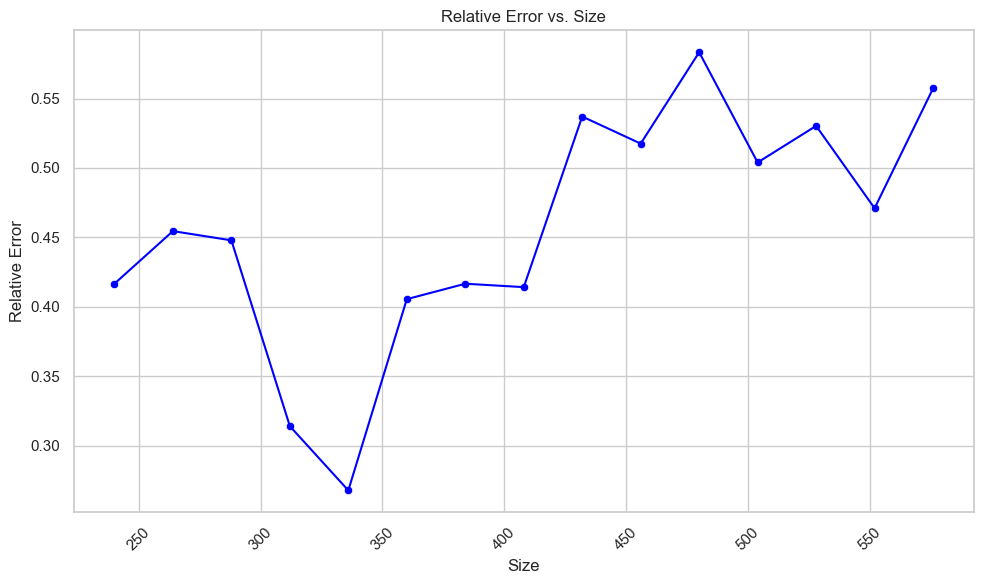

In [29]:
df = pd.DataFrame(list(relative_error_status.items()), columns=['Size', 'Relative Error Status'])

# Create a Seaborn plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size', y='Relative Error Status', data=df, color='blue')
sns.lineplot(x='Size', y='Relative Error Status', data=df, color='blue')
plt.xlabel('Size')
plt.ylabel('Relative Error')
plt.title('Relative Error vs. Size')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
relative_error_energy

{100: 53.94,
 121: 45.80165289256198,
 144: 45.49305555555556,
 169: 37.79289940828402,
 196: 34.91326530612245}